In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [41]:
df=pd.read_csv("/content/trainable_complete2.xls")
df.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350.0,5.0,14.0,Afternoon_flight,11.0
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255.0,5.0,16.0,Evening_flight,13.0
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260.0,5.0,16.0,Evening_flight,13.0
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305.0,5.0,7.0,Morning_flight,4.0
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320.0,5.0,9.0,Morning_flight,6.0


In [43]:
df.tail()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
343902,9338,09:50,23:50,Spicejet,PE,Port Blair,30,Mumbai,1,840.0,6.0,9.0,Morning_flight,15.0
343903,9338,09:50,08:20,Spicejet,PE,Port Blair,30,Mumbai,1,1350.0,6.0,9.0,Morning_flight,15.0
343904,11092,09:50,09:05,Spicejet,PE,Port Blair,30,Bengaluru,1,1395.0,6.0,9.0,Morning_flight,15.0
343905,5588,09:50,12:05,Spicejet,PE,Port Blair,30,Chennai,0,135.0,6.0,9.0,Morning_flight,15.0
343906,5313,11:55,14:20,Vistara,PE,Port Blair,30,Kolkata,0,145.0,6.0,11.0,Afternoon_flight,17.0


In [44]:
#no of data points and number of feature
df.shape

(343907, 14)

In [45]:
#get info about datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343907 entries, 0 to 343906
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              343907 non-null  int64  
 1   departure_time     343907 non-null  object 
 2   arrival_time       343907 non-null  object 
 3   Airline            343907 non-null  object 
 4   Cabin              343907 non-null  object 
 5   Dept_city          343907 non-null  object 
 6   Dept_date          343907 non-null  int64  
 7   arrival_city       343907 non-null  object 
 8   stops              343907 non-null  int64  
 9   duration           343906 non-null  float64
 10  weekday            343906 non-null  float64
 11  dept_hours         343906 non-null  float64
 12  Dept_flights_time  343906 non-null  object 
 13  optimal_hours      343906 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 36.7+ MB


In [46]:
# check missing values
df.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             1
weekday              1
dept_hours           1
Dept_flights_time    1
optimal_hours        1
dtype: int64

In [47]:
df.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             1
weekday              1
dept_hours           1
Dept_flights_time    1
optimal_hours        1
dtype: int64

In [48]:
#mean value of optimal_hours column
df["optimal_hours"].mean()

12.594764266979931

In [49]:
#filling the missing values in optimal_hours column with mean value that we just calculated abo
df["optimal_hours"].fillna(df["optimal_hours"].mean(), inplace=True);

In [50]:
df.isnull().sum()

Price                0
departure_time       0
arrival_time         0
Airline              0
Cabin                0
Dept_city            0
Dept_date            0
arrival_city         0
stops                0
duration             1
weekday              1
dept_hours           1
Dept_flights_time    1
optimal_hours        0
dtype: int64

In [51]:
df.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,343907.000000,343907.000000,343907.000000,343906.000000,343906.000000,343906.000000,343907.000000
mean,13816.912776,17.025053,1.278415,589.424959,2.829843,12.588390,12.594764
std,15728.238594,8.165108,0.803230,364.254766,2.084045,4.848031,6.908560
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5426.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7511.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11556.500000,24.000000,2.000000,840.000000,5.000000,16.000000,19.000000
max,115432.000000,31.000000,20.000000,1435.000000,6.000000,23.000000,23.000000


In [22]:
sns.set()

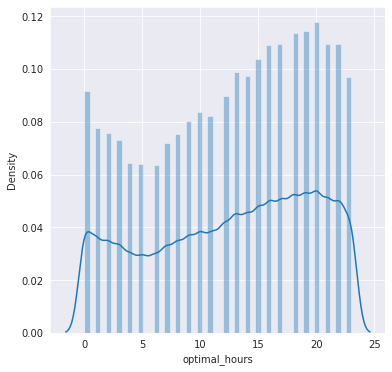

In [52]:
#Optimal_hours distribution
plt.figure(figsize=(6,6))
sns.distplot(df["optimal_hours"])
plt.show()

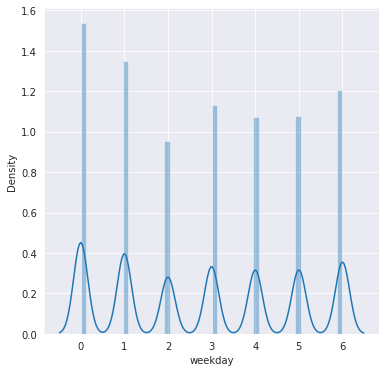

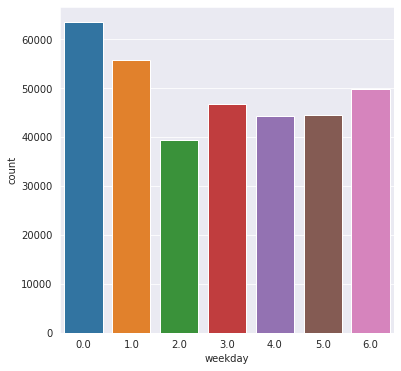

In [53]:
#weekday distribution
plt.figure(figsize=(6,6))
sns.distplot(df["weekday"])
plt.show()
#Weekday distribution
plt.figure(figsize=(6,6))
sns.countplot(x="weekday", data=df)
plt.show()

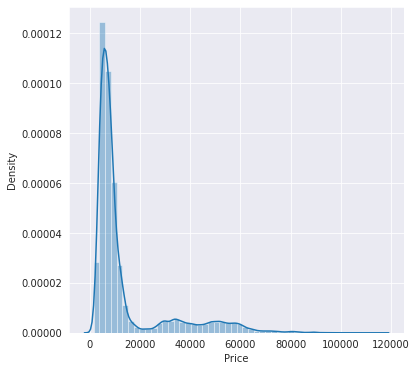

In [54]:
#Price distribution
plt.figure(figsize=(6,6))
sns.distplot(df["Price"])
plt.show()

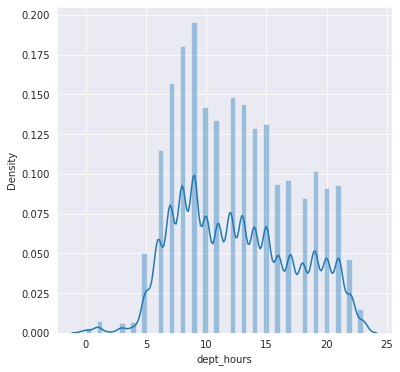

In [55]:
#dept_hours distribution
plt.figure(figsize=(6,6))
sns.distplot(df["dept_hours"])
plt.show()

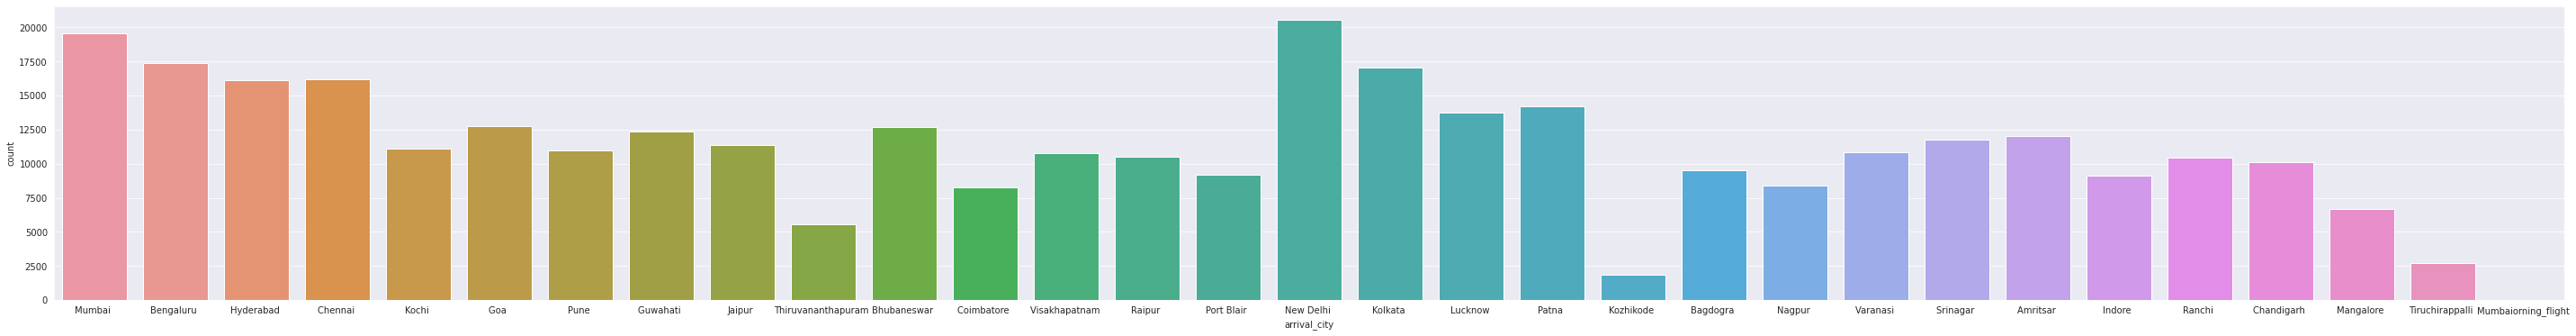

In [57]:
#arrival-city distribution
plt.figure(figsize=(50,6))
sns.countplot(x="arrival_city", data=df)
plt.show()

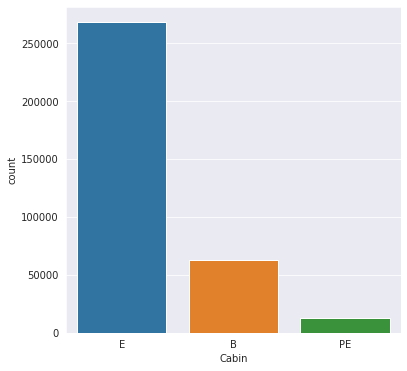

In [58]:
#Cabin distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Cabin", data=df)
plt.show()

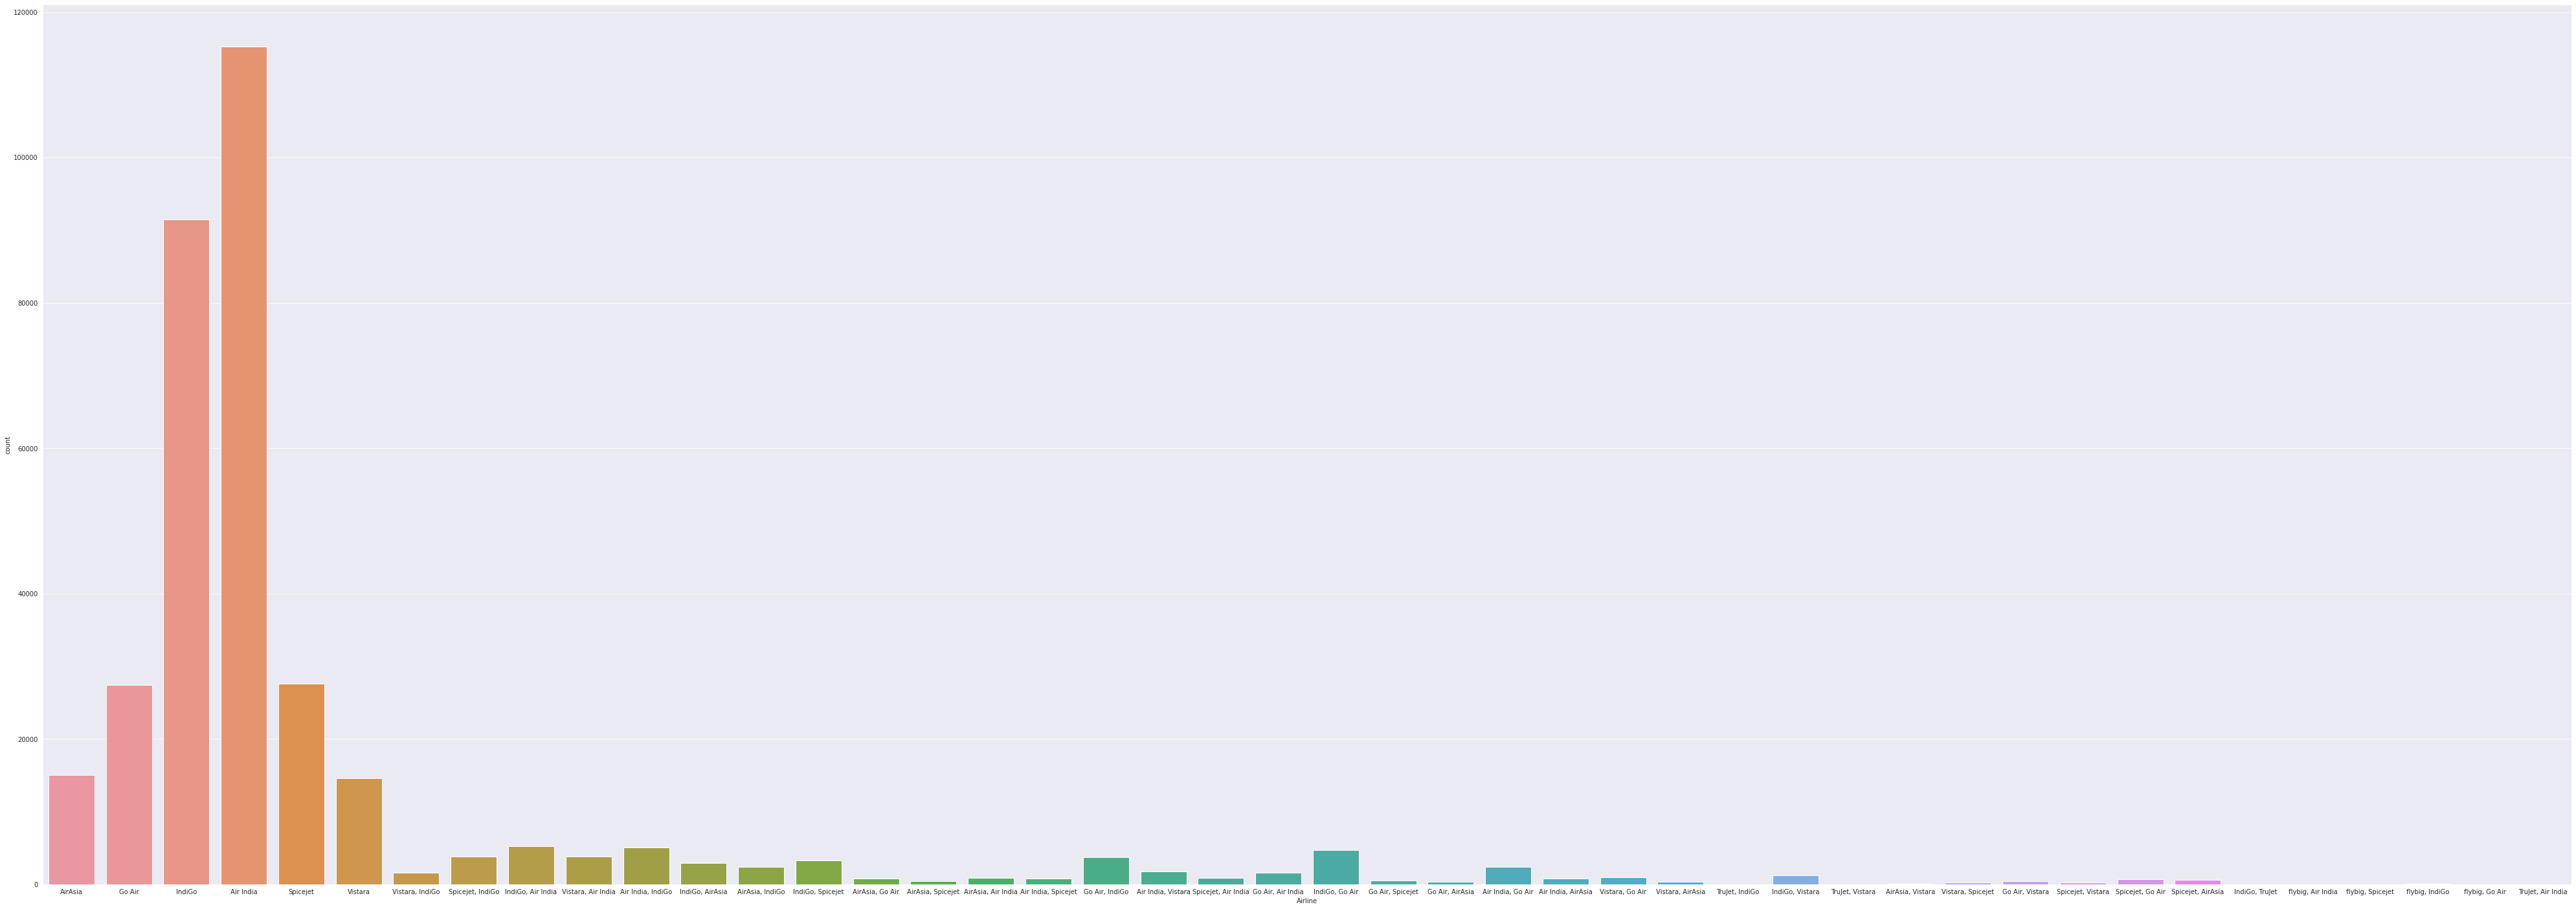

In [59]:
#Airline distribution
plt.figure(figsize=(70,25))
sns.countplot(x="Airline", data=df)
plt.show()

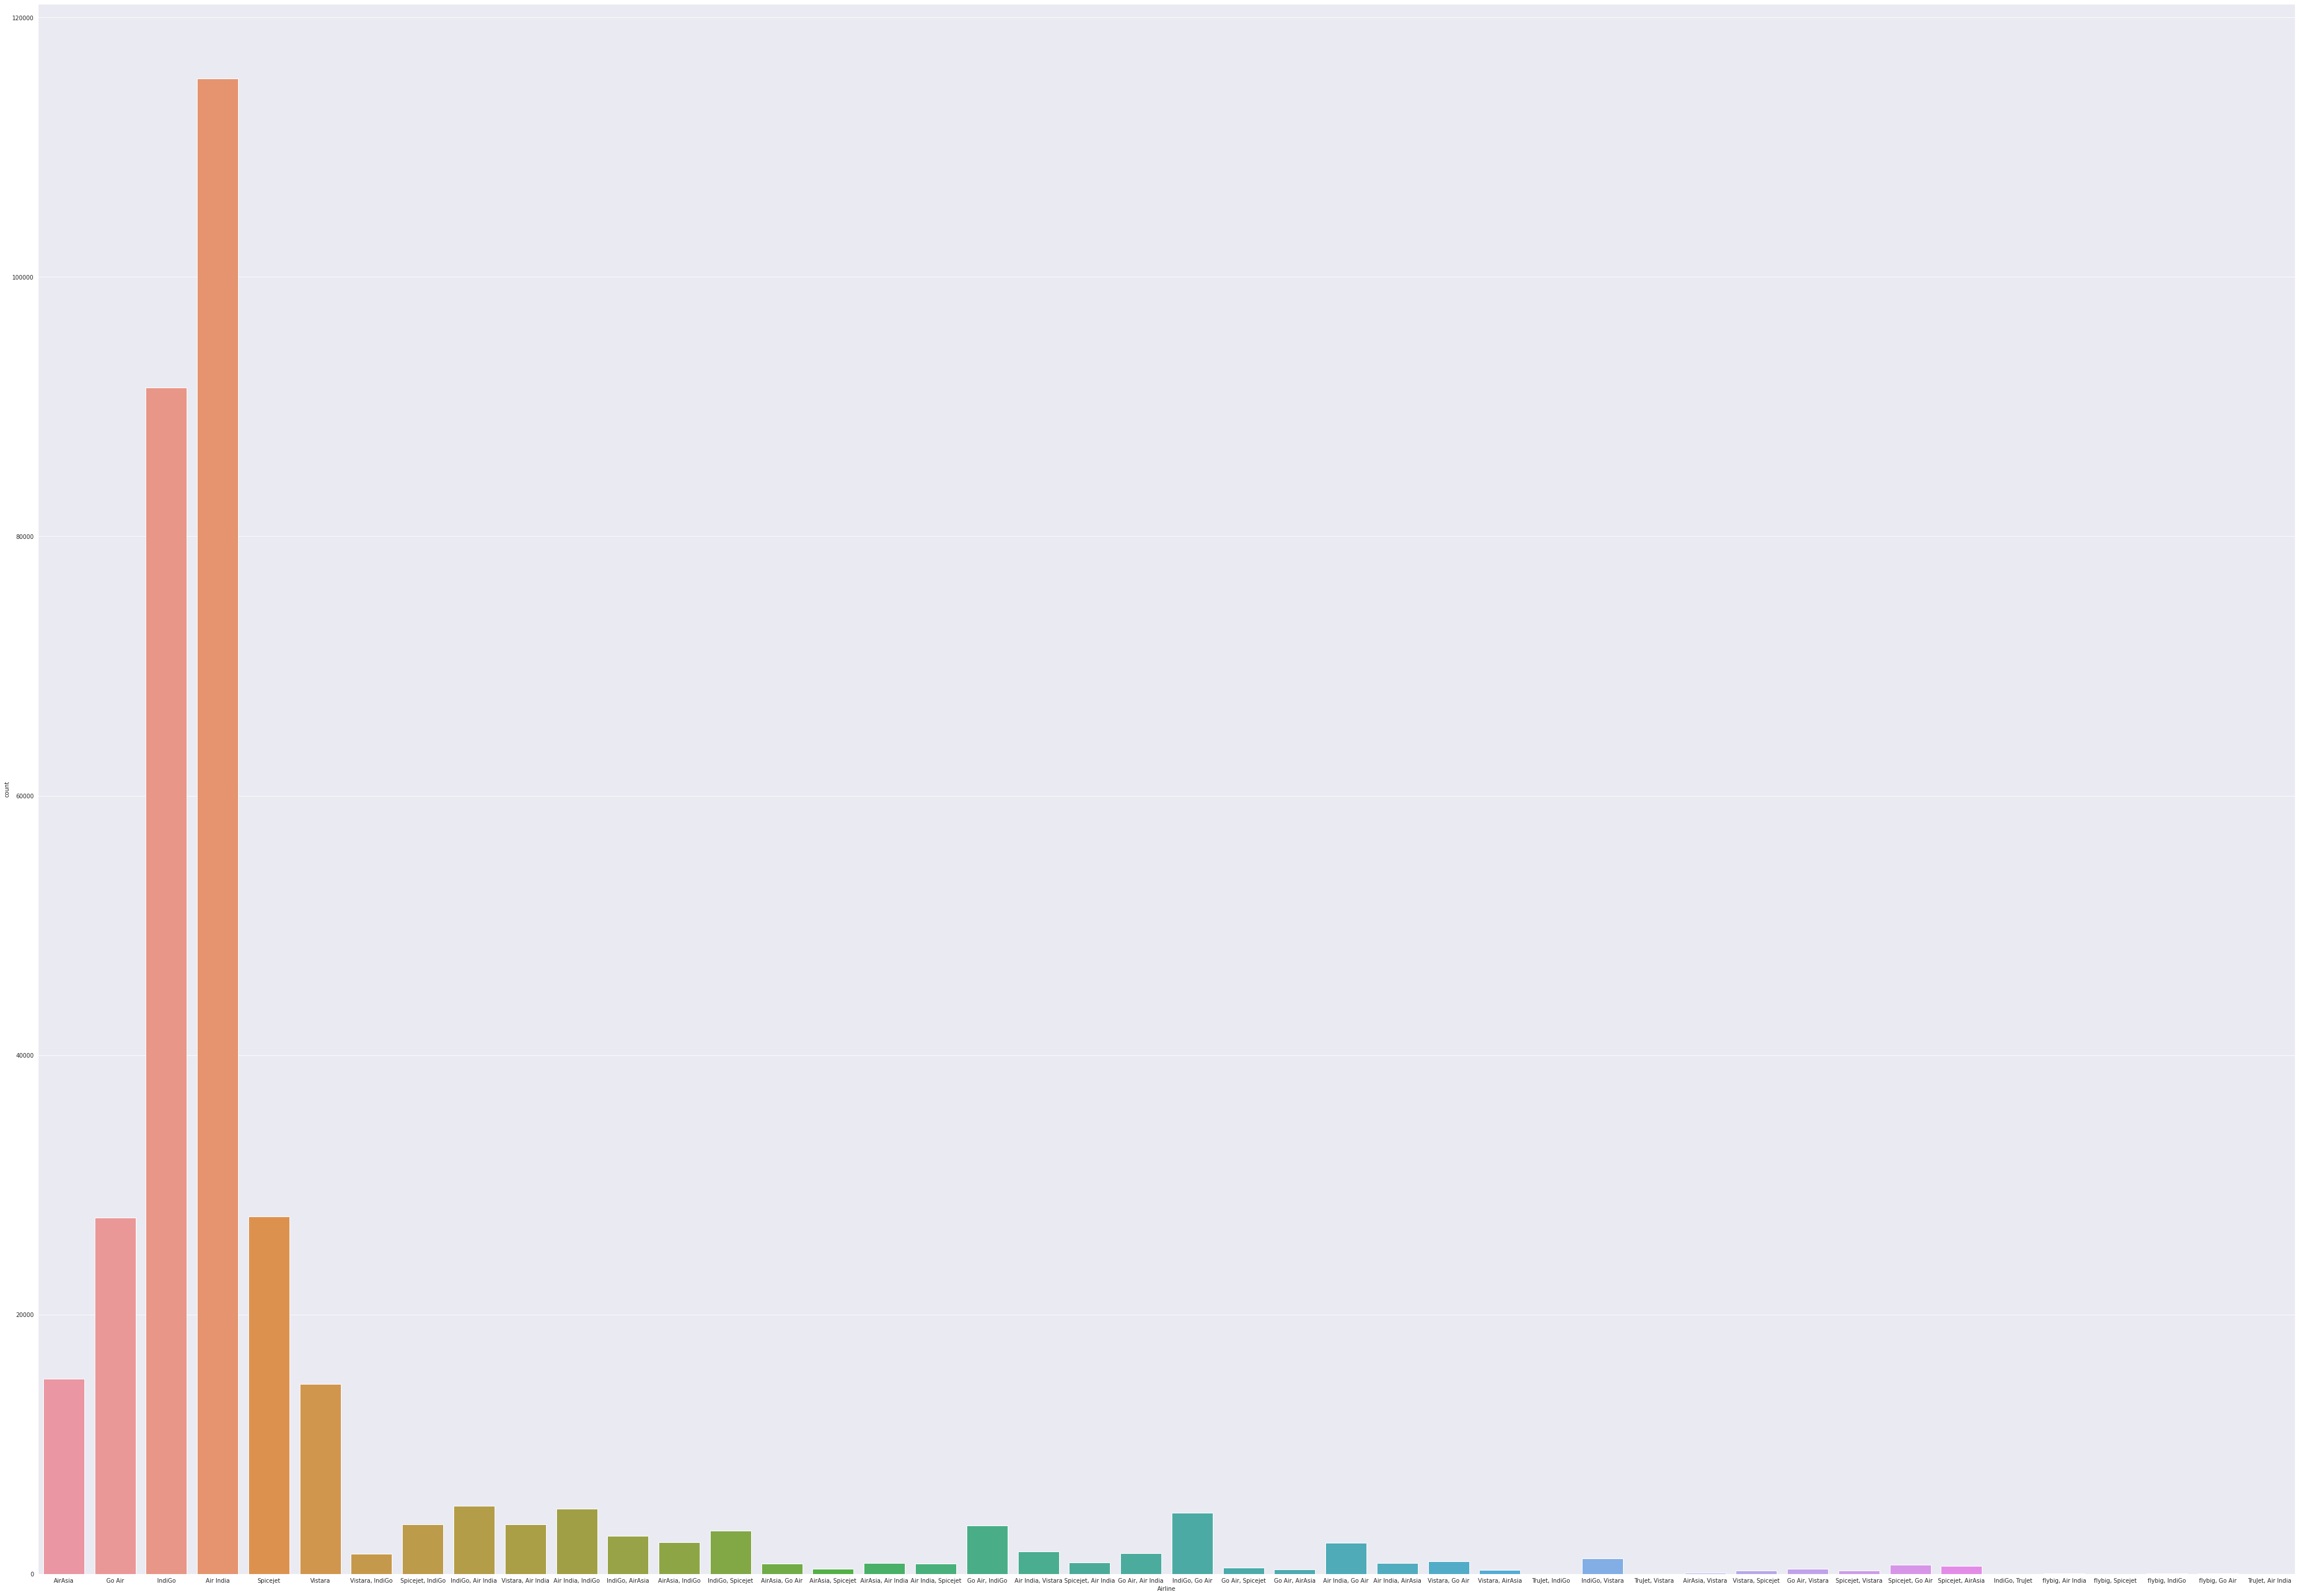

In [60]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(70,50))
sns.countplot(x="Airline", data=df)
plt.show()

In [61]:
df.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350.0,5.0,14.0,Afternoon_flight,11.0
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255.0,5.0,16.0,Evening_flight,13.0
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260.0,5.0,16.0,Evening_flight,13.0
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305.0,5.0,7.0,Morning_flight,4.0
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320.0,5.0,9.0,Morning_flight,6.0


In [62]:
df['Airline'].value_counts()

Air India              115281
IndiGo                  91454
Spicejet                27552
Go Air                  27454
AirAsia                 15038
Vistara                 14629
IndiGo, Air India        5225
Air India, IndiGo        5042
IndiGo, Go Air           4708
Vistara, Air India       3815
Spicejet, IndiGo         3815
Go Air, IndiGo           3716
IndiGo, Spicejet         3310
IndiGo, AirAsia          2919
AirAsia, IndiGo          2424
Air India, Go Air        2401
Air India, Vistara       1739
Go Air, Air India        1597
Vistara, IndiGo          1559
IndiGo, Vistara          1206
Vistara, Go Air           968
Spicejet, Air India       869
AirAsia, Air India        829
Air India, AirAsia        815
AirAsia, Go Air           806
Air India, Spicejet       800
Spicejet, Go Air          725
Spicejet, AirAsia         602
Go Air, Spicejet          493
AirAsia, Spicejet         413
Go Air, Vistara           399
Go Air, AirAsia           338
Vistara, AirAsia          312
Spicejet, 

In [63]:
df['Dept_city'].value_counts()

New Delhi             22999
Mumbai                20823
Bengaluru             18484
Hyderabad             17393
Kolkata               16696
Chennai               15872
Patna                 13967
Srinagar              13579
Goa                   13200
Lucknow               13130
Guwahati              12699
Amritsar              12168
Kochi                 11585
Pune                  11234
Jaipur                11136
Varanasi              10934
Bhubaneswar           10929
Bagdogra              10795
Ranchi                 9867
Chandigarh             9724
Visakhapatnam          9645
Indore                 8875
Raipur                 8665
Nagpur                 7764
Port Blair             7578
Mangalore              6991
Coimbatore             6520
Thiruvananthapuram     5695
Kozhikode              2989
Tiruchirappalli        1971
Name: Dept_city, dtype: int64

In [64]:
df['stops'].value_counts()

1     202161
2      73303
0      39418
3      25414
4       3424
5        185
20         1
6          1
Name: stops, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [66]:
flight_data.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,19,1,17,1,350,5,14,Afternoon_flight,11.0
1,3113,16:55,21:10,Go Air,E,19,1,17,1,255,5,16,Evening_flight,13.0
2,3113,16:45,21:05,Go Air,E,19,1,17,1,260,5,16,Evening_flight,13.0
3,3113,07:55,13:00,Go Air,E,19,1,17,1,305,5,7,Morning_flight,4.0
4,3113,09:00,14:20,Go Air,E,19,1,17,1,320,5,9,Morning_flight,6.0


In [67]:
class DataFrame_Info():
    def __init__(self):
        print("Attribute information")
    
    def Attribute_information(self,df):
       
        
        data_info=pd.DataFrame(columns=['No of observation',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Factor variables',
                                       'No of Categorival variables',
                                       'No of Logical variables',
                                       'No of Date Variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of observation']=df.shape[0]

        data_info.loc[0,'No of variables']=df.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=df._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Factor variables']=df.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of Categorival variables']=df.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Logical variables']=df.select_dtypes(include='bool').shape[1]
        
        data_info.loc[0,'No of Date Variables']=df.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        
        data_info.columns=['value']
        
        
        
        return data_info
    
    
    
    def Agg_Tabulation(self,data):
       
        
        print('='*100)
        print('Aggrgation of Table')
        
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1=pd.DataFrame(data.columns,columns=['Names'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of missing']=data.isnull().sum().values
        table['No of unique']=data.nunique().values
        table['Percent of missing']=((data.isnull().sum().values)/(data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
    
        return table
        
        
        print('*'*100)
        print('Interquartile Range')
    def _iqr(self,x):
      
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
       
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
       
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
       
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num

In [68]:
dataframe=DataFrame_Info()

Attribute information


In [69]:
dataframe.Agg_Tabulation(df)



Aggrgation of Table


,Name,dtypes,No of missing,No of unique,Percent of missing,First Observation,Second observation,Third Observation
0,Price,int64,0,16283,0.000000,3112,3113,3113
1,departure_time,object,0,248,0.000000,14:30,16:55,16:45
2,arrival_time,object,0,256,0.000000,20:20,21:10,21:05
3,Airline,object,0,44,0.000000,AirAsia,Go Air,Go Air
4,Cabin,object,0,3,0.000000,E,E,E
5,Dept_city,object,0,30,0.000000,New Delhi,New Delhi,New Delhi
6,Dept_date,int64,0,31,0.000000,1,1,1
7,arrival_city,object,0,31,0.000000,Mumbai,Mumbai,Mumbai
8,stops,int64,0,8,0.000000,1,1,1
9,duration,float64,1,288,0.000291,350.0,255.0,260.0


In [70]:
dataframe.Attribute_information(df)


,value
No of observation,343907
No of variables,14
No of Numerical variables,7
No of Factor variables,0
No of Categorival variables,7
No of Logical variables,0
No of Date Variables,0
No of zero variance variables,0


In [71]:
dataframe.num_count_summary(df)


,Negitive values,Positive values,Zero values,Unique_count,Negitive_infinity_count,Positive_infinity_count,Percentage of miisning values,Count of outliers
Price,0.0,343907.0,0.0,16283.0,0.0,0.0,0.000000,58970.0
Dept_date,0.0,343907.0,0.0,31.0,0.0,0.0,0.000000,0.0
stops,0.0,304489.0,39418.0,8.0,0.0,0.0,0.000000,3611.0
duration,0.0,343490.0,416.0,289.0,0.0,0.0,0.000003,0.0
weekday,0.0,280475.0,63431.0,8.0,0.0,0.0,0.000003,0.0
dept_hours,0.0,343415.0,491.0,25.0,0.0,0.0,0.000003,0.0
optimal_hours,0.0,329390.0,14517.0,25.0,0.0,0.0,0.000000,0.0


In [72]:
dataframe.statstical_summary(df)


,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Price,343907.0,13816.912776,15728.238594,1579.0,5426.0,7511.0,11556.5,115432.0,4152.0,40354.0,53150.0
Dept_date,343907.0,17.025053,8.165108,1.0,10.0,17.0,24.0,31.0,6.0,28.0,30.0
stops,343907.0,1.278415,0.803230,0.0,1.0,1.0,2.0,20.0,0.0,2.0,3.0
duration,343906.0,589.424959,364.254766,0.0,325.0,515.0,840.0,1435.0,130.0,1160.0,1290.0
weekday,343906.0,2.829843,2.084045,0.0,1.0,3.0,5.0,6.0,0.0,6.0,6.0
dept_hours,343906.0,12.588390,4.848031,0.0,9.0,12.0,16.0,23.0,7.0,20.0,21.0
optimal_hours,343907.0,12.594764,6.908560,0.0,7.0,13.0,19.0,23.0,2.0,21.0,22.0


In [73]:
#load the categorical data in to the "cat_data" and get the patters inside of the categorical data
cat_data=df.select_dtypes(include="object")
cat_data.head()


,departure_time,arrival_time,Airline,Cabin,Dept_city,arrival_city,Dept_flights_time
0,14:30,20:20,AirAsia,E,New Delhi,Mumbai,Afternoon_flight
1,16:55,21:10,Go Air,E,New Delhi,Mumbai,Evening_flight
2,16:45,21:05,Go Air,E,New Delhi,Mumbai,Evening_flight
3,07:55,13:00,Go Air,E,New Delhi,Mumbai,Morning_flight
4,09:00,14:20,Go Air,E,New Delhi,Mumbai,Morning_flight


In [74]:
#Check the values in each variables inside of the categorical data
def value_cat(var,cat_data):
  print("*"*15+var+"*"*15)
  print(cat_data[var].value_counts())

In [75]:
for _ in cat_data.columns:
  value_cat(_,cat_data)

***************departure_time***************
08:55    5233
09:40    4990
12:10    4833
15:25    4747
21:10    4528
         ... 
22:40      11
01:00       6
00:05       4
02:25       4
01:50       3
Name: departure_time, Length: 248, dtype: int64
***************arrival_time***************
18:10    6670
22:20    6533
08:25    5569
09:05    5123
08:55    4391
         ... 
02:45       3
05:15       3
01:55       2
02:10       2
03:30       1
Name: arrival_time, Length: 256, dtype: int64
***************Airline***************
Air India              115281
IndiGo                  91454
Spicejet                27552
Go Air                  27454
AirAsia                 15038
Vistara                 14629
IndiGo, Air India        5225
Air India, IndiGo        5042
IndiGo, Go Air           4708
Vistara, Air India       3815
Spicejet, IndiGo         3815
Go Air, IndiGo           3716
IndiGo, Spicejet         3310
IndiGo, AirAsia          2919
AirAsia, IndiGo          2424
Air India, Go Air     

In [76]:
columns_to_do_plot=cat_data[['Airline', 'Cabin', 'Dept_city', 'departure_time', 'arrival_time','arrival_city','Dept_flights_time']]


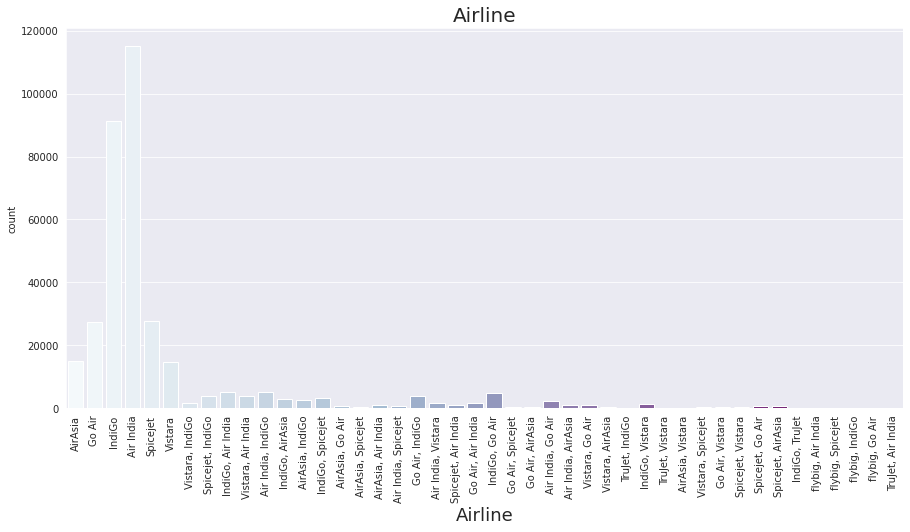

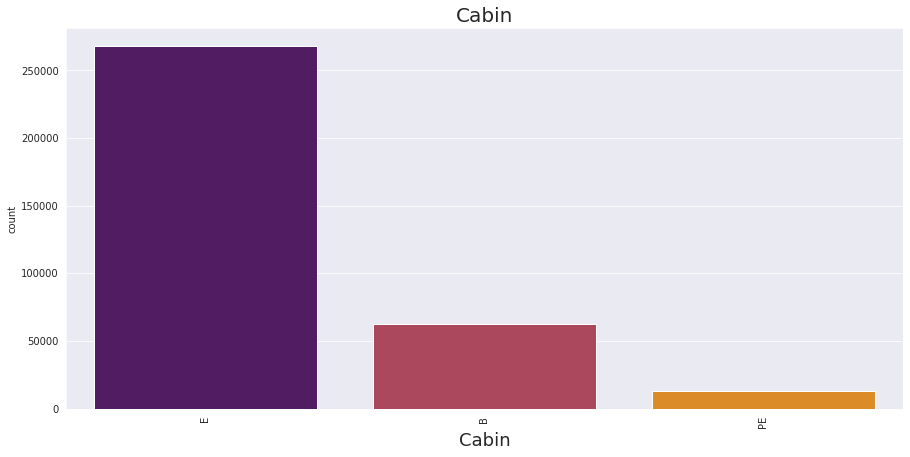

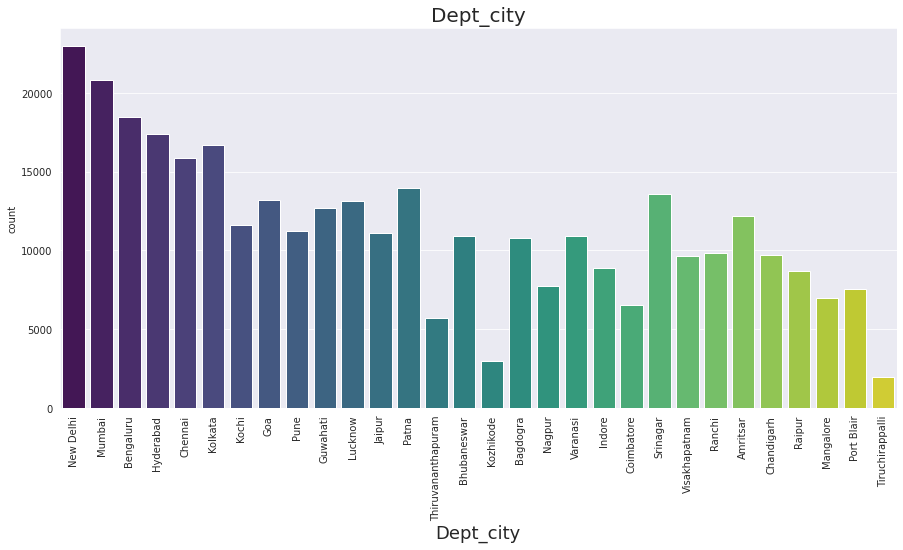

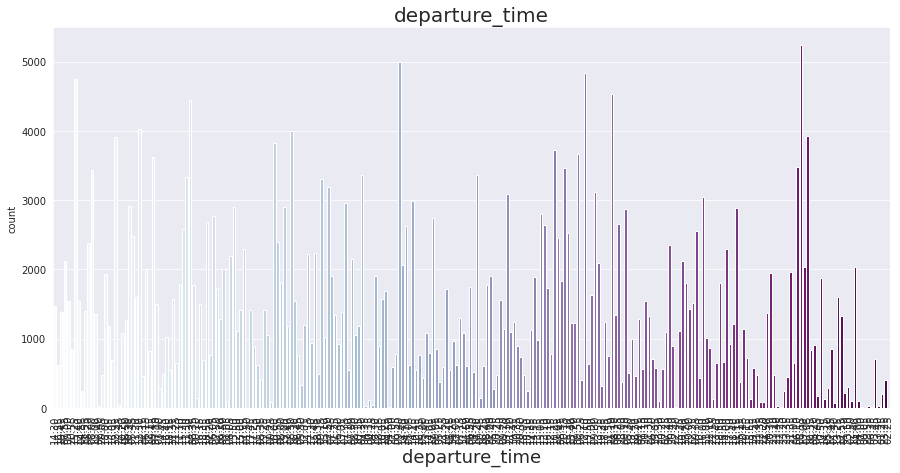

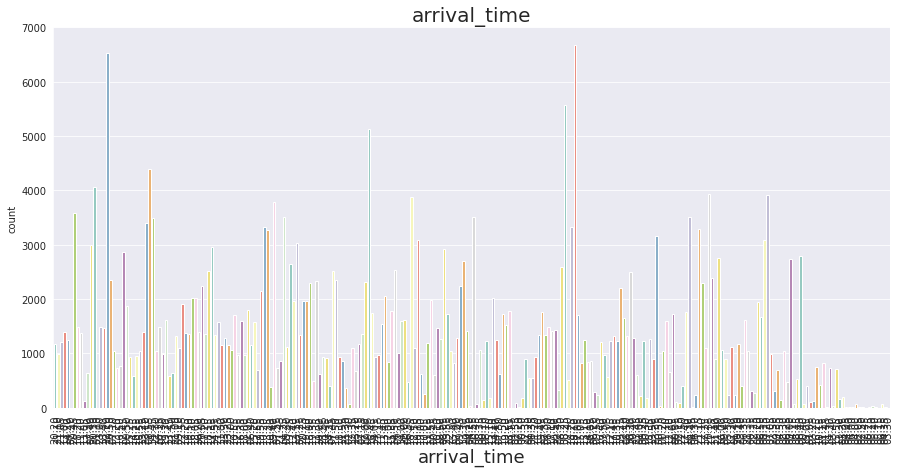

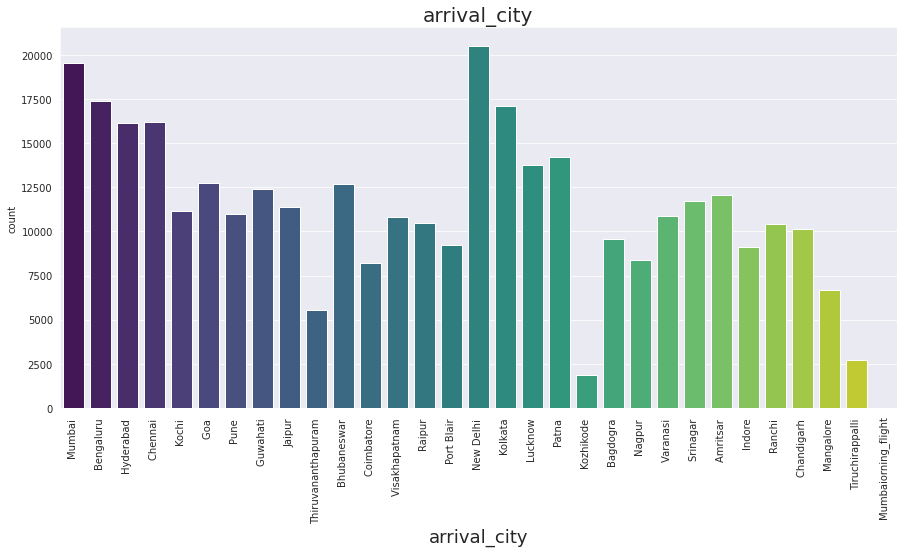

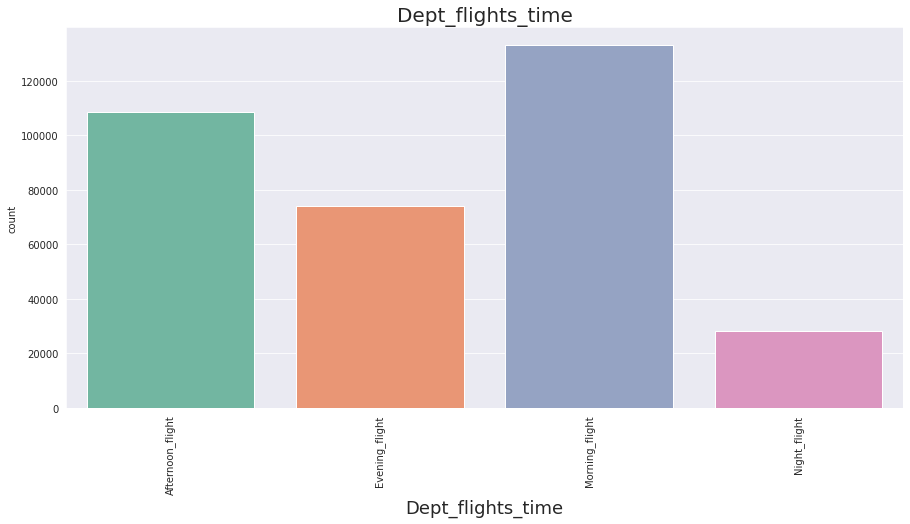

In [77]:
#Visualize the categories with the help of bar plot
import random
for i in columns_to_do_plot.columns:
  for j in random.choices(['summer','viridis','Set1','Set2','Set3','BuPu','inferno']):
    plt.figure(figsize=(15,7))
    sns.set_style('darkgrid')
    g=sns.countplot(x=i,data=cat_data,palette=j)
    g.set_xlabel(i,fontsize=18)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_title(i,fontsize=20)
    plt.show()


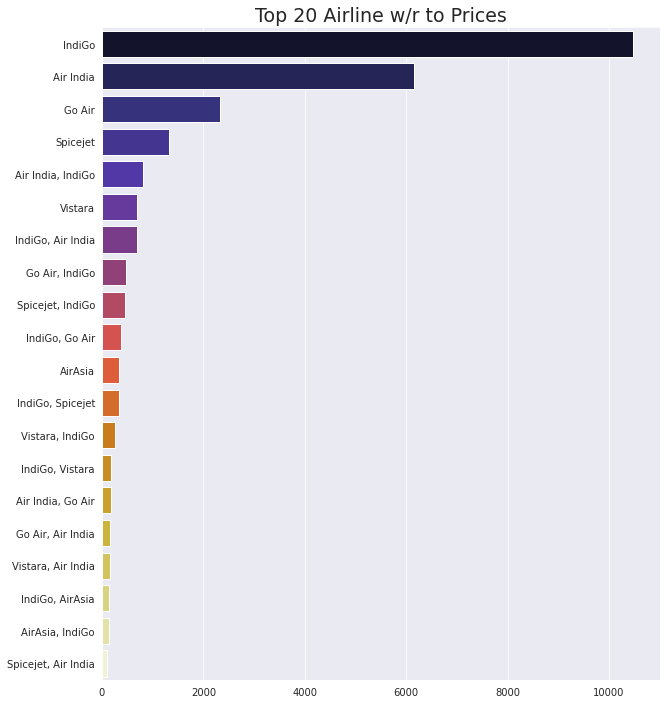

In [16]:

top_20=flight_data["Airline"].value_counts()[:20]
plt.figure(figsize=(10,12))
gv=sns.barplot(y=top_20.index,x=top_20.values,data=flight_data,palette="CMRmap")
plt.title("Top 20 Airline w/r to Prices",fontsize=19)
plt.show()

In [78]:
def compare_with_tar(var,columns_to_do_plot,df):
  plt.style.use('fivethirtyeight')
  sns.catplot(x=var,y='Price',data=df,palette="viridis",aspect=2,height=5,kind='box')
  plt.title(var+"vs Price")
  plt.xticks(rotation=90)
  plt.show()

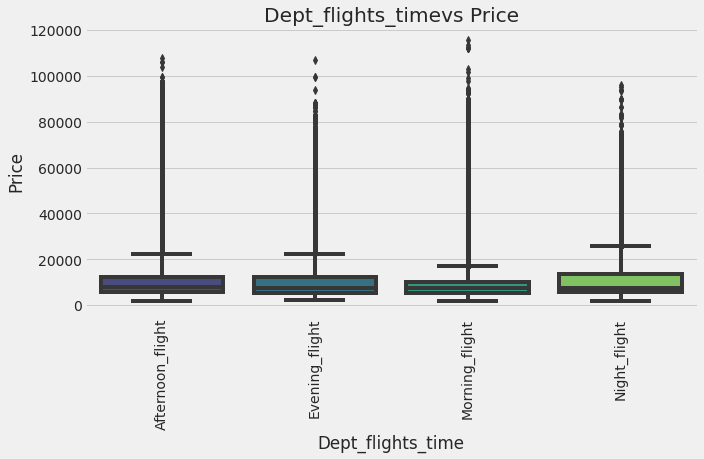

In [79]:
compare_with_tar("Dept_flights_time",columns_to_do_plot,df)

In [82]:
#Check Stops and dept flight time with the price
gv=df.groupby(["stops","Dept_flights_time"])[["Price"]].mean()
print(f"The flight price of the '{gv['Price'].idxmax()[1]}' is comparitvely higher with the No stops of '{gv['Price'].idxmax()[0]}' and the flight price is '{gv['Price'].max()}'",'\n')
print(f"The flight price of the '{gv['Price'].idxmin()[1]}' is comparitvely lower and the No of stops are '{gv['Price'].idxmin()[0]}' and the flight price is '{gv['Price'].min()}'")


The flight price of the 'Afternoon_flight' is comparitvely higher with the No stops of '6' and the flight price is '90117.0' 

The flight price of the 'Night_flight' is comparitvely lower and the No of stops are '0' and the flight price is '5970.698981516409'


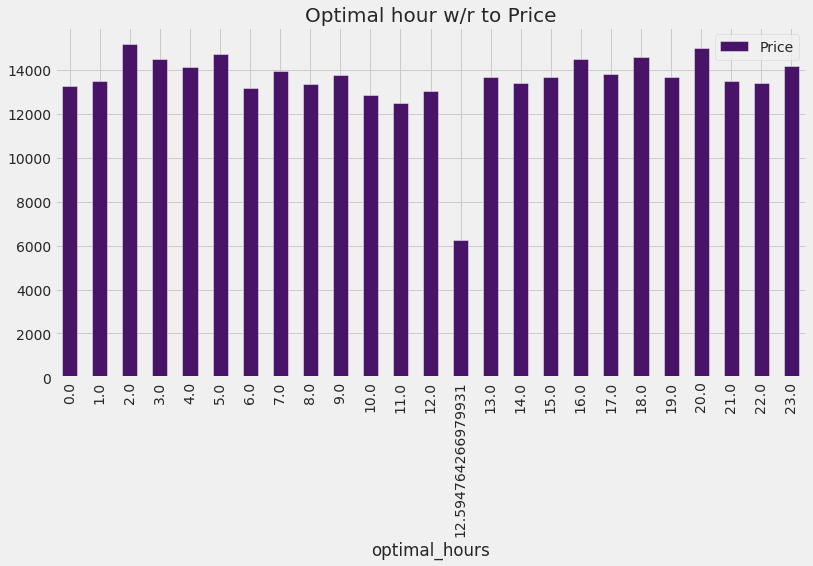

In [83]:
vg=df.groupby("optimal_hours")[["Price"]].mean()
vg.plot.bar(color=sns.color_palette("viridis",18),figsize=(12,6))
plt.title("Optimal hour w/r to Price",fontsize=20)
plt.show()

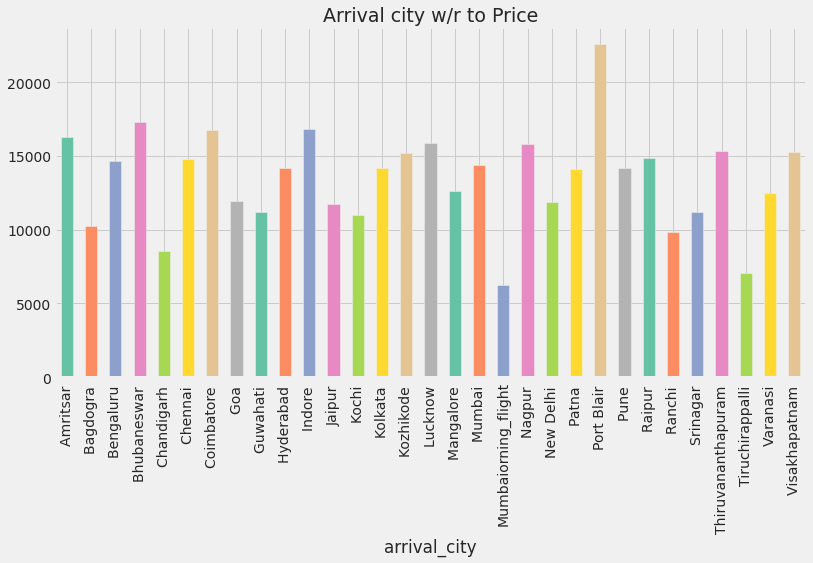

In [84]:
arr=df.groupby("arrival_city")["Price"].mean()
arr.plot.bar(color=sns.color_palette("Set2",8),figsize=(12,6))
plt.title("Arrival city w/r to Price",fontsize=19)
plt.show()

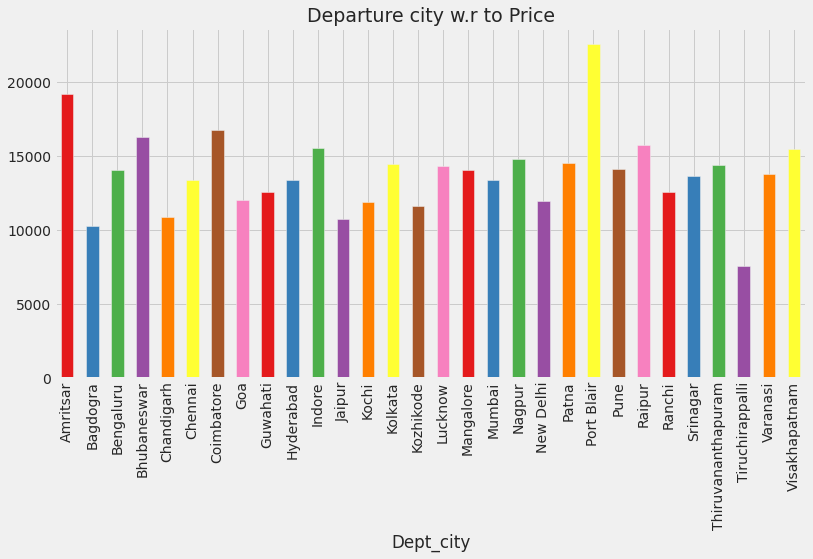

In [85]:
arr1=df.groupby("Dept_city")["Price"].mean()
arr1.plot.bar(color=sns.color_palette("Set1",8),figsize=(12,6))
plt.title("Departure city w.r to Price",fontsize=19)
plt.show()

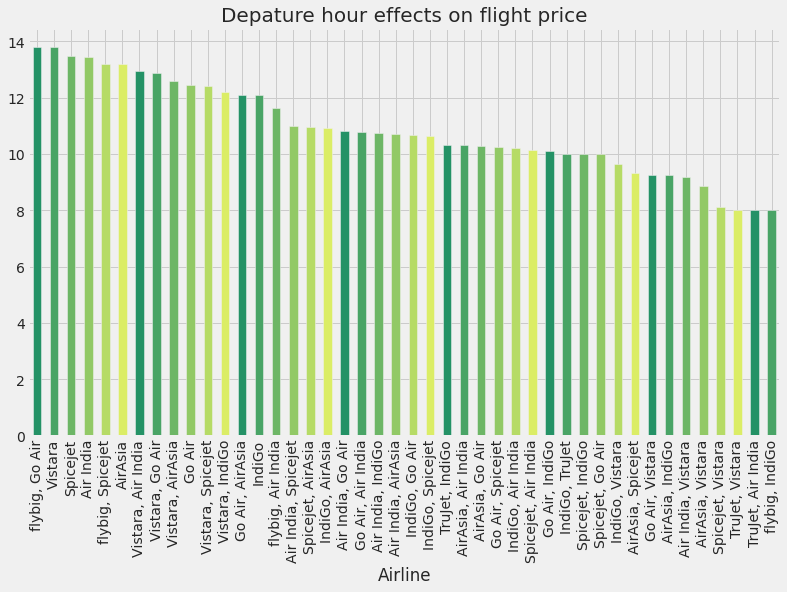

In [86]:
debt=df.groupby("Airline")["dept_hours"].mean().sort_values(ascending=False)
debt.plot.bar(color=sns.color_palette("summer"),figsize=(12,7))
plt.title("Depature hour effects on flight price",fontsize=20)
plt.show()

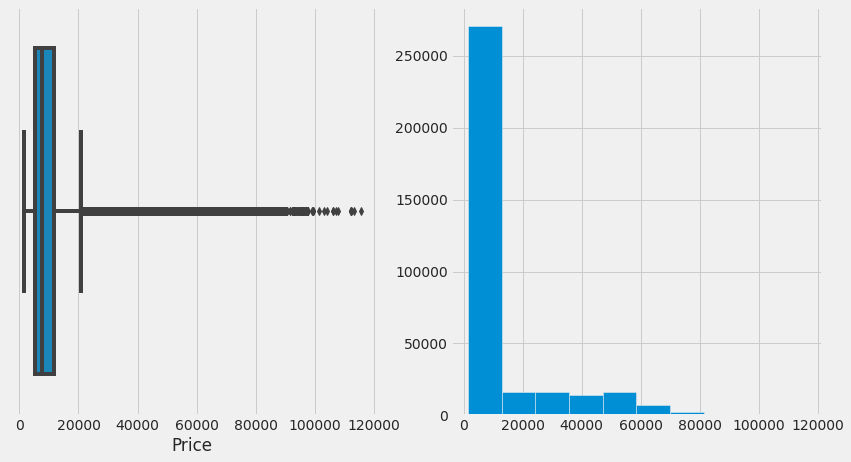

In [89]:
fig,ax=plt.subplots(1,2,figsize=(13,7))
df["Price"].hist(ax=ax[1])
sns.boxplot(x=df['Price'],ax=ax[0])

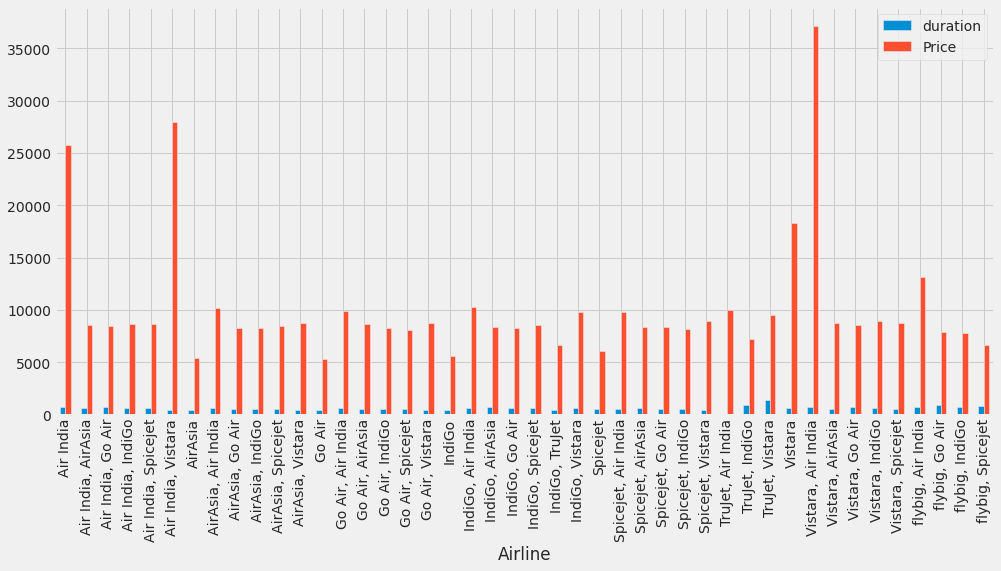

In [90]:
#Whcih airline takes high duration with respect to the price
ddr=df.groupby("Airline")[["duration","Price"]].mean()
ddr.plot.bar(figsize=(15,7))

Text(0.5, 1.0, 'Correlation Matrix')

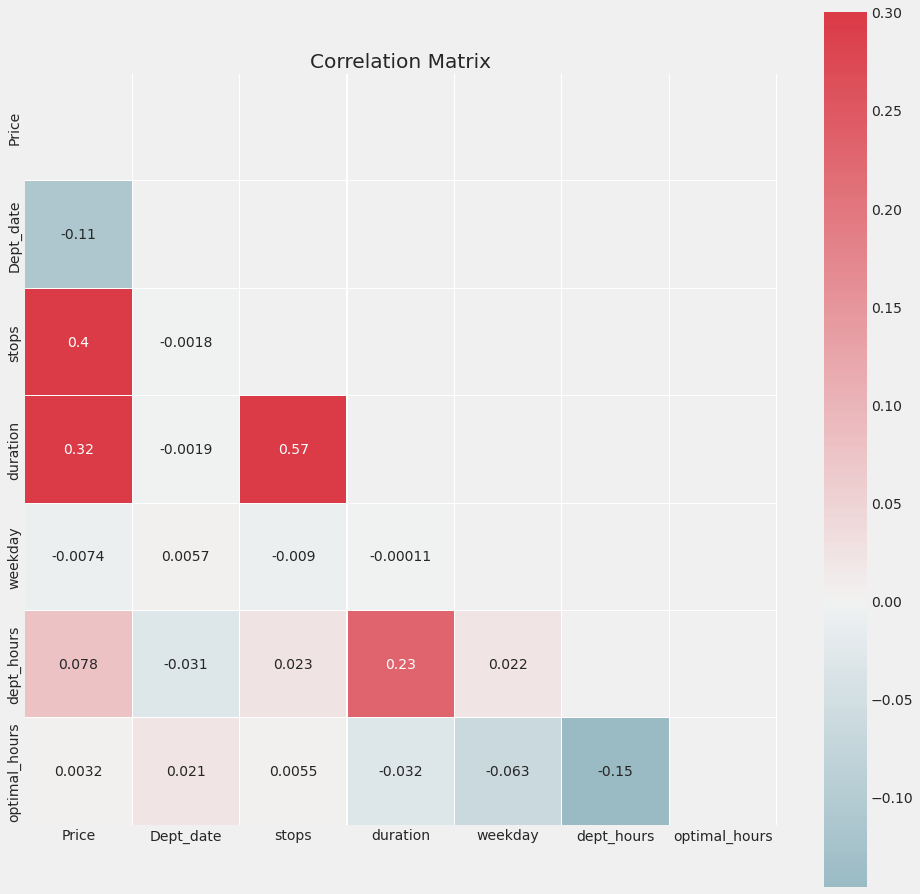

In [91]:
#Finding and plotting the correlation matrix for top20 features

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))

corr=df.corr()

#Genrate a mask triangle for a upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,vmax=0.3,center=0,square=True,cmap=cmap,linewidths=0.05)
plt.title('Correlation Matrix')

As we can see the correlation matrix

Stops-Price is moderatly correlated (0.47)
Duration-Price is Higly Correlated (0.41)
Dept_hrs-Optimal_hr is Strongly correlated (0.85)
Stops-Duration is moderatly correlated (0.57)

In [92]:
recent=pd.DataFrame(df['Airline'].apply(lambda x: x.split(',')).values.tolist(),columns=['Airline_1','Airline_2'])
recent_1=recent["Airline_1"]
recent_1

0          AirAsia
1           Go Air
2           Go Air
3           Go Air
4           Go Air
            ...   
343902    Spicejet
343903    Spicejet
343904    Spicejet
343905    Spicejet
343906     Vistara
Name: Airline_1, Length: 343907, dtype: object

In [93]:
fill_val=recent["Airline_2"].fillna(recent["Airline_1"])
#After handling null values in the airline column concatinate the airline column with the main dataframe
df_new=pd.concat([df,recent_1,fill_val],axis=1)
df_new.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline_1,Airline_2
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350.0,5.0,14.0,Afternoon_flight,11.0,AirAsia,AirAsia
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255.0,5.0,16.0,Evening_flight,13.0,Go Air,Go Air
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260.0,5.0,16.0,Evening_flight,13.0,Go Air,Go Air
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305.0,5.0,7.0,Morning_flight,4.0,Go Air,Go Air
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320.0,5.0,9.0,Morning_flight,6.0,Go Air,Go Air


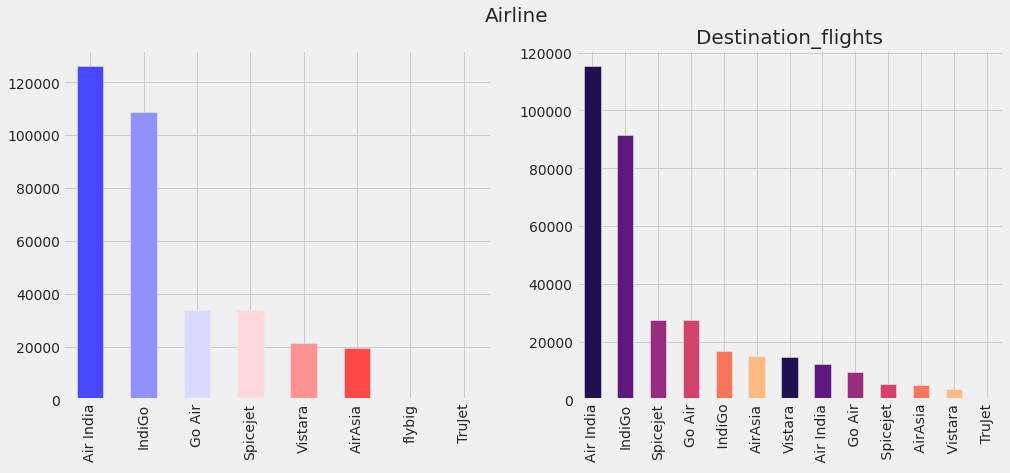

In [94]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
air1=df_new["Airline_1"].value_counts()
air2=df_new["Airline_2"].value_counts()
air1.plot.bar(color=sns.color_palette("bwr"),ax=ax[0],label="Departure Flights")
air2.plot.bar(color=sns.color_palette("magma"),ax=ax[1])
plt.title("Destination_flights",fontsize=20)
plt.suptitle("Airline",fontsize=20)
plt.show()

In [95]:
df_new['Airline_1'].replace("Air India Express","Air India",inplace=True)


In [96]:
df_new["Airline_2"].replace([" Air India Express","Air India Express"," Air India"],"Air India",inplace=True)


In [97]:
df_new["Airline_2"].replace([" AirAsia"," Go Air"," Vistara"," Spicejet"," IndiGo"],["AirAsia","Go Air","Vistara","Spicejet","IndiGo"],inplace=True)


As of Now i converted all categorical values in to the numerical with the help of label encoder based on the model perfromance we can check again and convert in to the different fromat

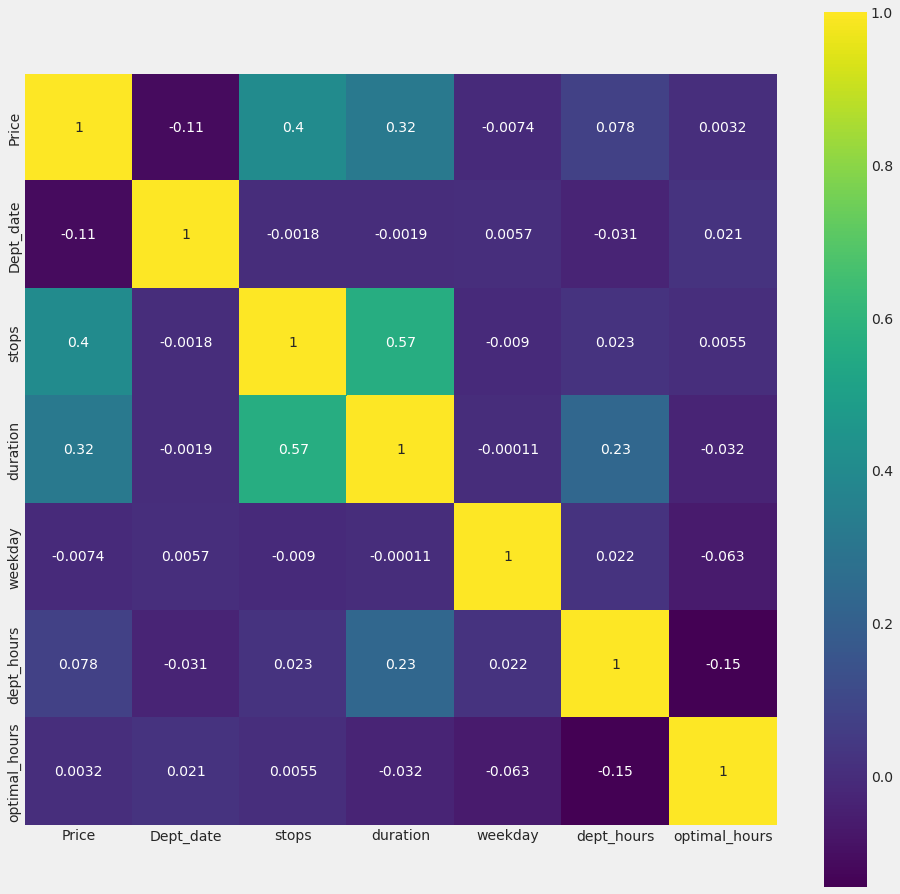

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(df_1.corr(),annot=True,cmap="viridis",square=True)
plt.show()